In [1]:
import torch

In [2]:
from torch import nn

In [3]:
import matplotlib.pyplot as plt

In [10]:
start = 0.0
end = 1.0
step = 0.005
weight1 = 0.5
weight2 = 0.3
bias = 0.2
x = torch.arange(start, end, step).unsqueeze(1)
y = weight1*(x**2) - weight2*x + bias
x, y

(tensor([[0.0000],
         [0.0050],
         [0.0100],
         [0.0150],
         [0.0200],
         [0.0250],
         [0.0300],
         [0.0350],
         [0.0400],
         [0.0450],
         [0.0500],
         [0.0550],
         [0.0600],
         [0.0650],
         [0.0700],
         [0.0750],
         [0.0800],
         [0.0850],
         [0.0900],
         [0.0950],
         [0.1000],
         [0.1050],
         [0.1100],
         [0.1150],
         [0.1200],
         [0.1250],
         [0.1300],
         [0.1350],
         [0.1400],
         [0.1450],
         [0.1500],
         [0.1550],
         [0.1600],
         [0.1650],
         [0.1700],
         [0.1750],
         [0.1800],
         [0.1850],
         [0.1900],
         [0.1950],
         [0.2000],
         [0.2050],
         [0.2100],
         [0.2150],
         [0.2200],
         [0.2250],
         [0.2300],
         [0.2350],
         [0.2400],
         [0.2450],
         [0.2500],
         [0.2550],
         [0.

In [11]:
from torch.utils.data import random_split, DataLoader # Import DataLoader as well

dataset = torch.utils.data.TensorDataset(x, y)

# Calculate split lengths
train_len = int(0.8 * len(dataset))
test_len = len(dataset) - train_len

# Split the dataset randomly
train_dataset, test_dataset = random_split(dataset, [train_len, test_len])

# Access data and labels using DataLoader (preferred)
train_loader = DataLoader(train_dataset, batch_size=len(train_dataset)) # One batch for all data
test_loader = DataLoader(test_dataset, batch_size=len(test_dataset))  # One batch for all data

x_train, y_train = next(iter(train_loader))
x_test, y_test = next(iter(test_loader))

In [12]:
def plot_predictions(train_data=x_train,
                     train_labels=y_train,
                     test_data=x_test,
                     test_labels=y_test,
                     predictions=None):
  """
  Plot training data and test predictions
  """
  plt.figure(figsize=(10, 10))

  # Plot training data in blue
  plt.scatter(train_data, train_labels, c="b", s=4, label="training data")

  # Plot test predictions in green
  plt.scatter(test_data, test_labels, c="g", s=4, label="test predictions")

  if predictions is not None:
    # Plot the predictions in red (predictions were made on the test data)
    plt.scatter(test_data, predictions, c="r", s=4, label="predictions")

  # Show the legend
  plt.legend(prop={"size": 14})

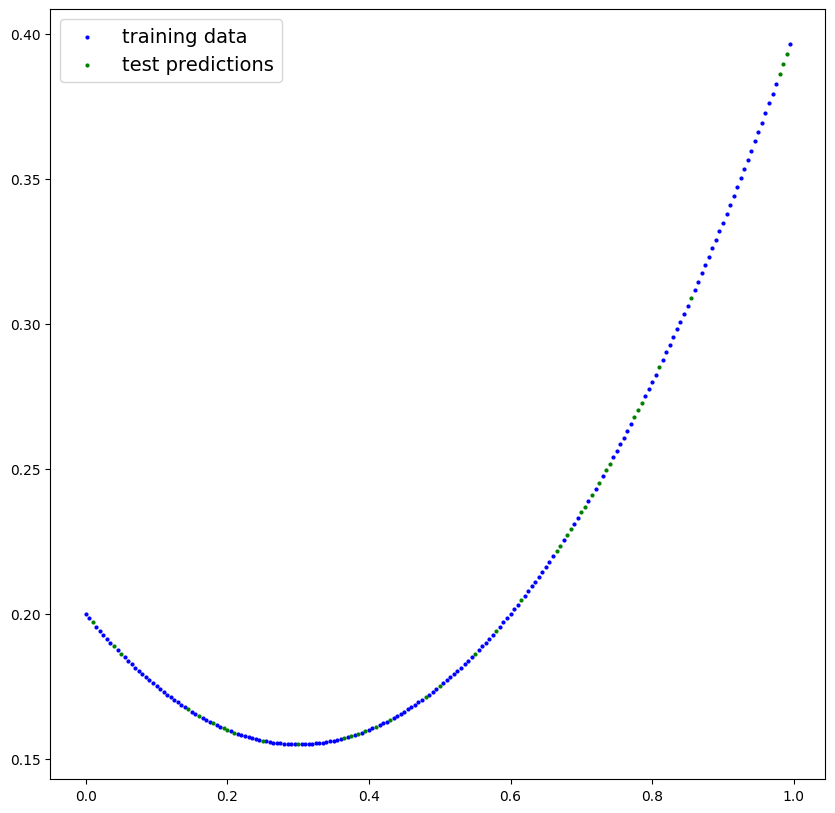

In [13]:
plot_predictions()

In [14]:
# Create a Linear Regression model class
class LinearRegressionModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.weight1 = nn.Parameter(torch.randn(1, dtype=torch.float), requires_grad=True)
    self.weight2 = nn.Parameter(torch.randn(1, dtype=torch.float), requires_grad=True)
    self.bias = nn.Parameter(torch.randn(1, dtype=torch.float), requires_grad=True)

  # Forward defines the computation in the model
  def forward(self, x: torch.Tensor) -> torch.Tensor:
    return self.weight1 * (x**2) - self.weight2 * x + self.bias

Epoch: 0 | MAE Train Loss: 1.06642484664917 | MAE Test Loss: 1.090220332145691 | Learning Rate: 0.005


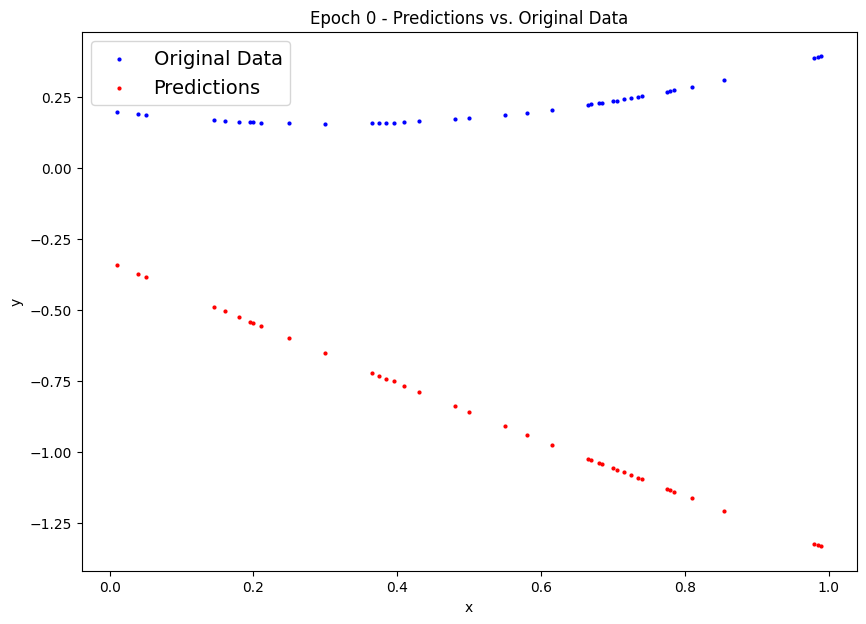

Epoch: 2500 | MAE Train Loss: 0.0002995816175825894 | MAE Test Loss: 0.0005734749138355255 | Learning Rate: 0.000625


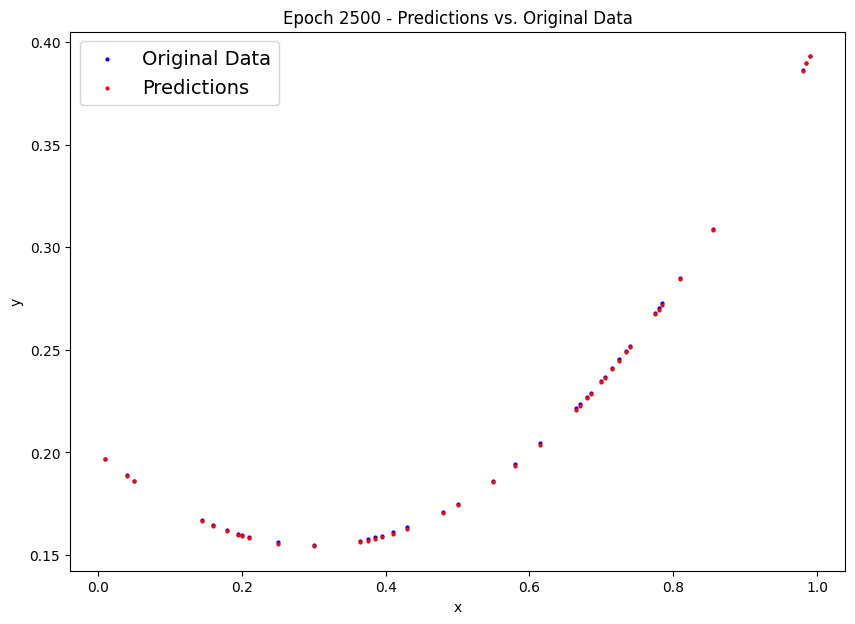

Epoch: 5000 | MAE Train Loss: 8.563883966417052e-06 | MAE Test Loss: 4.328414888732368e-06 | Learning Rate: 9.765625e-06


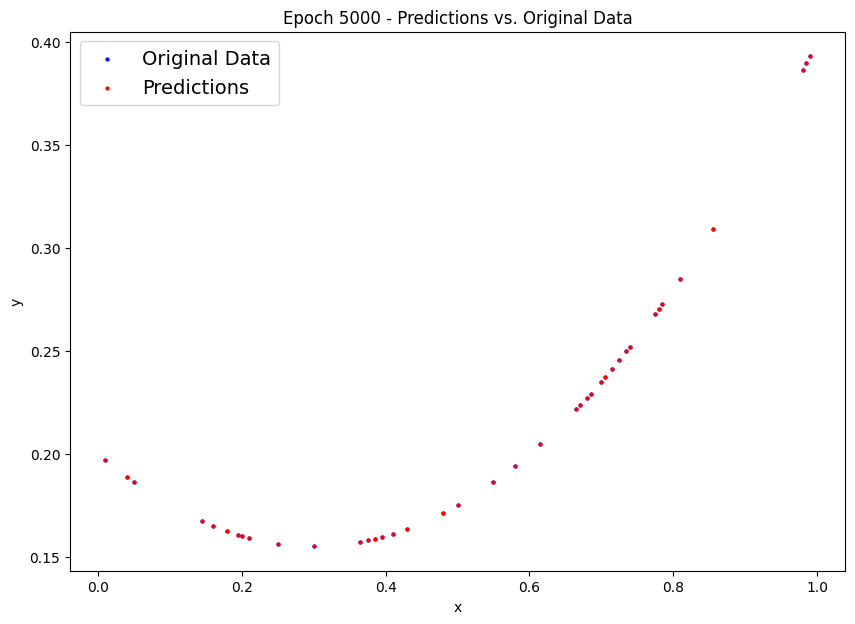

Epoch: 7500 | MAE Train Loss: 3.4822150496438553e-07 | MAE Test Loss: 3.173947220602713e-07 | Learning Rate: 3.814697265625e-08


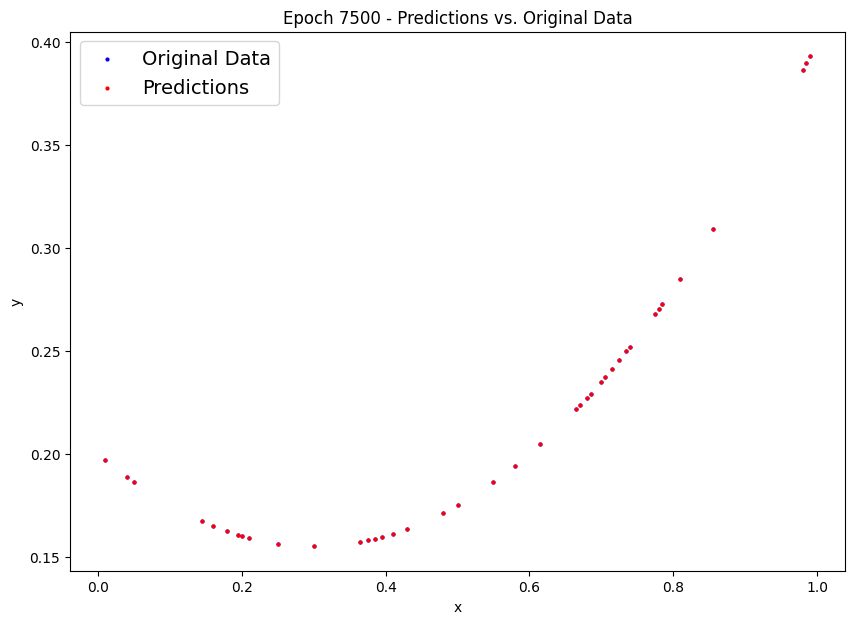

Epoch: 10000 | MAE Train Loss: 3.4822150496438553e-07 | MAE Test Loss: 3.173947220602713e-07 | Learning Rate: 1.9073486328125e-08


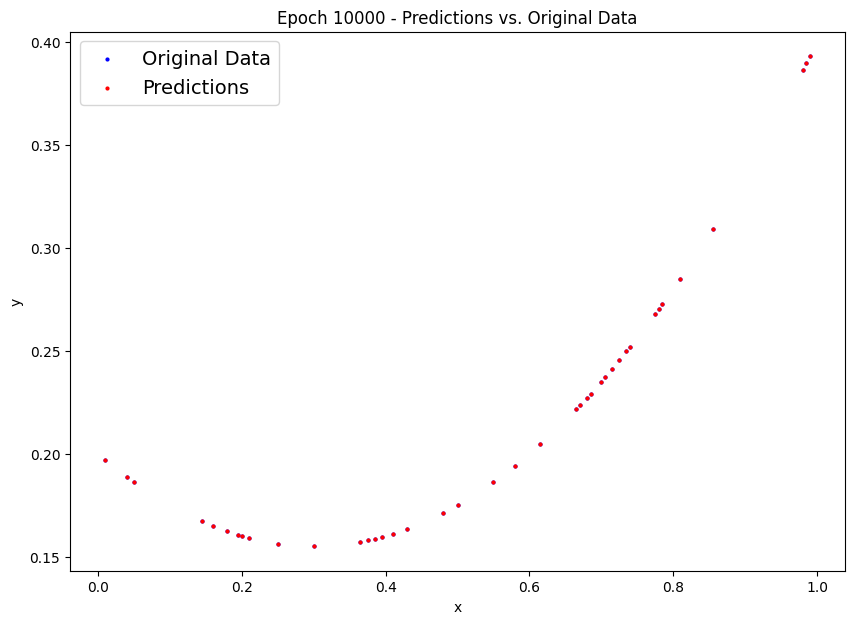

In [29]:
from random import randrange

torch.manual_seed(randrange(1000))
model_0 = LinearRegressionModel()

loss_fn = nn.L1Loss()
optimizer = torch.optim.SGD(params=model_0.parameters(), lr=0.005)

# Implementing learning rate scheduling
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, 'min', patience=250, factor=0.5)

# Set the number of epochs (how many times the model will pass over the training data)
epochs = 10001

# Create empty loss lists to track values
train_loss_values = []
test_loss_values = []
epoch_count = []

for epoch in range(epochs):
    ### Training

    # Put model in training mode (this is the default state of a model)
    model_0.train()

    # 1. Forward pass on train data using the forward() method inside
    y_pred = model_0(x_train)
    # print(y_pred)

    # 2. Calculate the loss (how different are our models predictions to the ground truth)
    loss = loss_fn(y_pred, y_train)

    # 3. Zero grad of the optimizer
    optimizer.zero_grad()

    # 4. Loss backwards
    loss.backward()

    # 5. Progress the optimizer
    optimizer.step()

    ### Testing

    # Put the model in evaluation mode
    model_0.eval()

    with torch.inference_mode():
      # 1. Forward pass on test data
      test_pred = model_0(x_test)

      # 2. Caculate loss on test data
      test_loss = loss_fn(test_pred, y_test.type(torch.float)) # predictions come in torch.float datatype, so comparisons need to be done with tensors of the same type

      # 3. Step the scheduler
      scheduler.step(test_loss)
      current_lr = scheduler.get_last_lr()[0]

      # Print out what's happening
      if epoch % 2500 == 0:
            epoch_count.append(epoch)
            train_loss_values.append(loss.detach().numpy())
            test_loss_values.append(test_loss.detach().numpy())
            print(f"Epoch: {epoch} | MAE Train Loss: {loss} | MAE Test Loss: {test_loss} | Learning Rate: {current_lr}")
             # --- Add plotting here ---
            plt.figure(figsize=(10, 7))
            plt.scatter(x_test, y_test, c="b", s=4, label="Original Data")
            plt.scatter(x_test, test_pred, c="r", s=4, label="Predictions")
            plt.title(f"Epoch {epoch} - Predictions vs. Original Data")
            plt.xlabel("x")
            plt.ylabel("y")
            plt.legend(prop={"size": 14})
            plt.show()
            # --------------------------

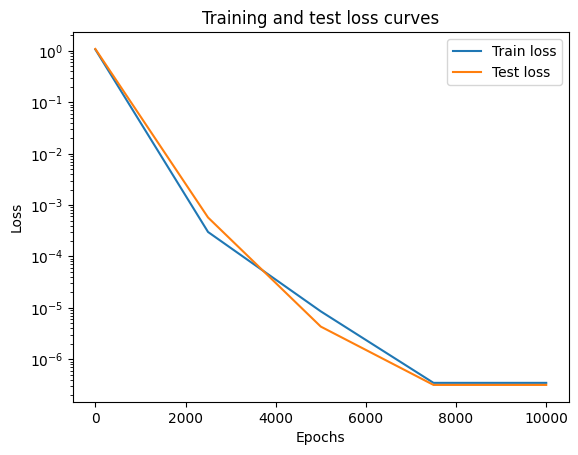

In [31]:
# Plot the loss curves
plt.plot(epoch_count, train_loss_values, label="Train loss")
plt.plot(epoch_count, test_loss_values, label="Test loss")
plt.title("Training and test loss curves")
plt.ylabel("Loss")
plt.xlabel("Epochs")

# Set y-axis to logarithmic scale
plt.yscale("log")

plt.legend();